<div class="frontmatter text-center">
<h1> MATH5027 Scientific Python</h1>
<h3>Central European University, Fall 2017/2018</h3>
<h3>Instructor: Prof. Roberta Sinatra, TA: Johannes Wachs</h3>
inspired to a lecture of J.R. Johansson [http://jrjohansson.github.io](http://jrjohansson.github.io).
</div>



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Numpy -  multidimensional data arrays
### Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [2]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
v.shape

(4,)

In [7]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [11]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [12]:
np.shape(M)

(2, 2)

In [13]:
np.size(M)

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [8]:
M.dtype

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [15]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [16]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [9]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step. Like the function range for lists!

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
x = np.arange(-1, 1, 0.1) #note that here we can use floats and non-integer steps. You could not do this with lists

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [4]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [5]:
np.logspace(0, 10, 10, base=10)

array([  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
         2.15443469e+03,   2.78255940e+04,   3.59381366e+05,
         4.64158883e+06,   5.99484250e+07,   7.74263683e+08,
         1.00000000e+10])

In [6]:
import math
np.logspace(0, 10, 10, base=math.exp(1))

array([  1.00000000e+00,   3.03773178e+00,   9.22781435e+00,
         2.80316249e+01,   8.51525577e+01,   2.58670631e+02,
         7.85771994e+02,   2.38696456e+03,   7.25095809e+03,
         2.20264658e+04])

#### random data

In [7]:
from numpy import random #numpy has also its random set of functions

In [8]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[ 0.08643465,  0.06809274,  0.68679907,  0.4638969 ,  0.81108437],
       [ 0.81117685,  0.73435487,  0.76570215,  0.46445587,  0.30463693],
       [ 0.99269648,  0.83752924,  0.17024063,  0.18054215,  0.6370737 ],
       [ 0.7459504 ,  0.0967356 ,  0.80296707,  0.5593708 ,  0.8827073 ],
       [ 0.60382848,  0.03755121,  0.80505765,  0.75474801,  0.89036877]])

standard normal distributed random numbers $\mu = 0$ and $\sigma^2=1$

In [9]:
np.random.randn(5,5)

array([[ -3.47883366e+00,  -2.78561440e-01,  -1.90494124e+00,
         -9.68266852e-01,   3.83580952e-01],
       [  9.82159256e-01,  -1.43373037e-01,   9.72551828e-01,
         -8.42878753e-01,   1.68831682e-01],
       [ -1.41418392e-01,  -5.28915277e-01,  -1.21496300e-01,
          8.55110149e-01,  -7.03765074e-01],
       [  3.90360053e-03,   4.15610814e-01,  -1.34326229e+00,
         -1.09518678e+00,  -1.33346819e-03],
       [ -3.73412949e-01,  -1.19193808e+00,  -4.87255461e-01,
         -1.01243275e+00,   6.27540894e-01]])

There is a huge variety of functions that you can use: 
<img src="random1.png" width="700px"/>

and you can generate samples from all the major distributions:
<img src="random2.png" width="700px"/>
Have a look at the [ documentation] http://docs.scipy.org/doc/numpy/reference/routines.random.html .

#### zeros and ones

You can also create arrays filled with the same element:

In [25]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [27]:
np.zeros((3,3))+2 #We will see more matrix and vectors operations on the next class 

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.],
       [ 2.,  2.,  2.]])

In [28]:
np.ones((3,3))*4 #We will see more matrix and vectors operations on the next class

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.],
       [ 4.,  4.,  4.]])

Let's create some fake data - 400 points evenly spaced in $[0,1]$:

In [3]:
X = np.linspace(0,1,400)
X.shape

(400,)

Now, let's take the cosine of X and add some small gaussian noise (with mean 0 and variance 1):

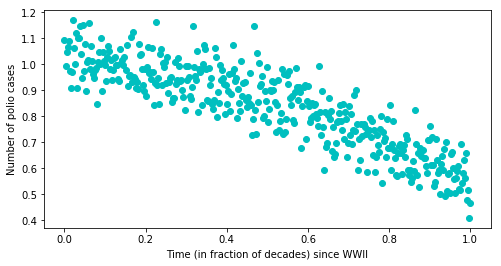

In [5]:
Y = np.cos(X) + 0.075*(np.random.randn(*X.shape)) #The single star * unpacks the sequence into an argument you can pass

#Let's plot X vs Y
plt.figure(figsize=(8,4))
plt.plot(X,Y, 'co')

# ...and since this is fake data, we say that these are polio cases
plt.xlabel("Time (in fraction of decades) since WWII")
plt.ylabel("Number of polio cases")
plt.show()

## File I/O

In [31]:
np.savetxt("fakedata.dat", zip(X,Y)) #Numpy has its own I/O (= input/output) functions

In [32]:
!head fakedata.dat #Windows users use !type

0.000000000000000000e+00 9.058334328123317514e-01
2.506265664160400863e-03 1.090831742389307246e+00
5.012531328320801727e-03 1.129736812948221258e+00
7.518796992481202590e-03 9.402591198801151240e-01
1.002506265664160345e-02 9.788128908357284219e-01
1.253132832080200432e-02 1.042780126422557352e+00
1.503759398496240518e-02 8.605098381642445338e-01
1.754385964912280604e-02 9.461642668405048084e-01
2.005012531328320691e-02 9.463610652739079532e-01
2.255639097744360777e-02 1.040073875863255948e+00


Another possibility is to use np.vstack, which stacks vectors vertically (row wise):

In [33]:
print X.shape, Y.shape
stacked_array=np.vstack((X,Y))
print stacked_array.shape
stacked_array.T.shape

(400,) (400,)
(2, 400)


(400, 2)

In [34]:
np.savetxt("fakedata2.dat", stacked_array.T)

In [35]:
!head fakedata2.dat #Windows users can use !type

0.000000000000000000e+00 9.058334328123317514e-01
2.506265664160400863e-03 1.090831742389307246e+00
5.012531328320801727e-03 1.129736812948221258e+00
7.518796992481202590e-03 9.402591198801151240e-01
1.002506265664160345e-02 9.788128908357284219e-01
1.253132832080200432e-02 1.042780126422557352e+00
1.503759398496240518e-02 8.605098381642445338e-01
1.754385964912280604e-02 9.461642668405048084e-01
2.005012531328320691e-02 9.463610652739079532e-01
2.255639097744360777e-02 1.040073875863255948e+00


***
### Exercise
* What does .T do? Try to apply it two a 1-d array. Print its shape before and after applying it 
* Explore the help of np.concatenate: what is the difference with vstack?
***

In [30]:
arr = np.array([[1,2],[3,4],[5,6]])
#arr.T
arr2 = np.array([1,2,3,4])
arr2.shape
arr3 = arr2.T
arr3
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

Let's load our fake data:

In [36]:
data = np.loadtxt('fakedata.dat') 

In [37]:
data.shape

(400, 2)

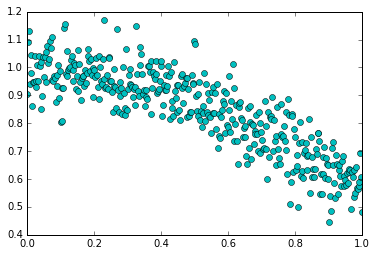

In [38]:
plt.plot(data[:,0],data[:,1], 'co')

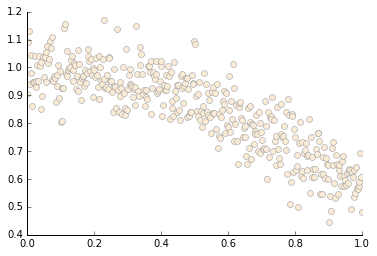

In [39]:
# Or prettier
fig, ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(data[:,0],data[:,1], 'o', markerfacecolor= '#FAEBD7',markeredgecolor=[.6, .6, .6])
plt.show()

```data[:,0]``` means take all the rows in data, but only the first column. This is a technique called masking - we will see more during next class.

We could also load data in two different variables with this trick

In [40]:
a,b = data.T

***
## Exercise
Generate data with $x \in [0,3]$ and $y=e^{-x+1}x^2+\text{gaussian noise*0.15}$

**Note**: you can multiply two numpy arrays point by point just using the multiplication *
***

In [32]:
X = np.linspace(0, 1, 200)
Y = np.exp(-X+1)*X**2 + 0.15*(np.random.randn(*X.shape))

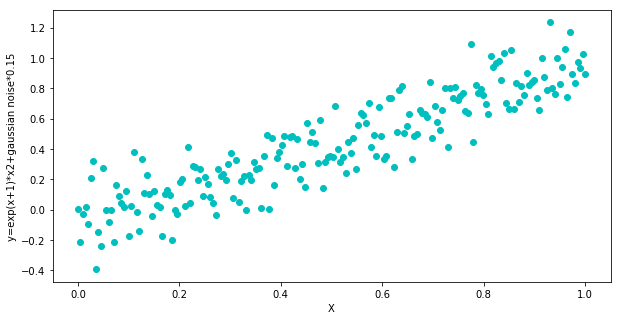

In [36]:
plt.figure(figsize=(10,5))
plt.plot(X,Y, "co")

# ...and since this is fake data, we say that these are polio cases
plt.xlabel("X")
plt.ylabel("y=exp(x+1)*x2+gaussian noise*0.15")
plt.show()

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). 

In [41]:
!head stockholm_temperatures.dat

1800	1	1	-6.10000000000000
1800	1	2	-15.4000000000000
1800	1	3	-15
1800	1	4	-19.3000000000000
1800	1	5	-16.8000000000000
1800	1	6	-11.4000000000000
1800	1	7	-7.60000000000000
1800	1	8	-7.10000000000000
1800	1	9	-10.1000000000000
1800	1	10	-9.50000000000000


The file stockholm_temperatures.dat contains the temperature in Stockholm since 1800 until 2011. The first three columns are respectively year, month and day, while the following column is the temperature.

To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example:

In [26]:
stockholm_data = np.genfromtxt('stockholm_temperatures.dat')

***
## Exercise
The file stockholm_temperatures.dat contains the temperature in Stockholm since 1800. The first three columns are respectively year, month and day, while the following column is the temperature.
* Read the file stockholm_temperatures.dat into a numpy array
* Plot the temperature vs time for the entire timespan
* Compare on the same plot the temperatures in the decades 1800 - 1810 and 2000 - 2010.
* Work on making the plots pretty!
***

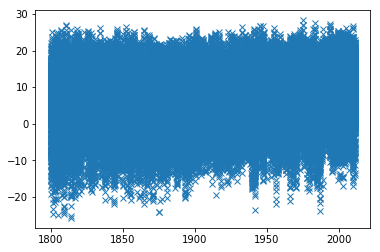

In [6]:
plt.plot(stockholm_data[:,0],stockholm_data[:,3], "x")


In [20]:
mask1800 = (stockholm_data[:,0] < 1811)
mask2000 = ((stockholm_data[:,0] > 1999) * (stockholm_data[:,0] < 2011))
stockholm_tempreture_1800 = stockholm_data[mask1800]
stockholm_tempreture_2000 = stockholm_data[mask2000], "r-",
print(stockholm_tempreture_1800[0:2,:])
#fig, ax1 = plt.subplots()
#stockholm_tempreture_2000
#plt.plot(stockholm_tempreture_1800[:,3], "r-",stockholm_tempreture_2000[:,3], "r-")


[[  1.80000000e+03   1.00000000e+00   1.00000000e+00  -6.10000000e+00]
 [  1.80000000e+03   1.00000000e+00   2.00000000e+00  -1.54000000e+01]]


## Manipulating arrays
### Indexing
We can index elements in an array using square brackets and indices:

In [40]:
v = np.array([1,2,3,4])
M = np.array([[1, 2], [3, 4]])
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [41]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [42]:
M

array([[1, 2],
       [3, 4]])

In [43]:
M[1]

array([3, 4])

*** 
### Quick exercise
If I have a list of lists, what is the syntax to access the first element of the first list? Pay attention to the difference with arrays!
***

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [44]:
A = np.array([1,2,3,4,5])


It works in the same way as for **lists**. Refresh it (class 1)!

In [45]:
A[1:3]

array([2, 3])

In [46]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

In [47]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [48]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [49]:
A[:3] # first three elements

array([ 1, -2, -3])

In [50]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [52]:
A[-1:]

array([5])

In [53]:
A[-2:]

array([4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [6]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [8]:
# a block from the original array
A[1:5, 1:3]

array([[11, 12],
       [21, 22],
       [31, 32],
       [41, 42]])

### Fancy indexing
Fancy indexing is the name for when an array or list is used in-place of an index: 

In [9]:
row_indices = [1, 2, 3]
A[row_indices,:] # this selects the second, third and fourth row of A, and all its columns

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [10]:
A[row_indices] #this is equivalent to the expression above

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [14]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

In [16]:
different_col_indices = [1, -1, 2] 
A[row_indices, different_col_indices]

array([11, 24, 32])

*** 
### Quick exercise
Look closely at the previous two fancy indexing. How are the elements selected? What is the difference?
***

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [64]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [65]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [67]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool) #1 is true, 0 is false
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [68]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [69]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [70]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

#### Hey, Matlab people
... the above rings a bell, right?

## Functions for extracting data from arrays and creating arrays

### where
The index mask can be converted to position index using the `where` function

In [73]:
import numpy as np
x = np.arange(0, 10, 0.5)
mask = (5 < x) * (x < 7.5)
indices = np.where(mask)
print type(indices)
indices

<type 'tuple'>


(array([11, 12, 13, 14]),)

In [74]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### Data processing

Often it is useful to store datasets in Numpy arrays because provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above:

In [76]:
!head stockholm_temperatures.dat

1800	1	1	-6.10000000000000
1800	1	2	-15.4000000000000
1800	1	3	-15
1800	1	4	-19.3000000000000
1800	1	5	-16.8000000000000
1800	1	6	-11.4000000000000
1800	1	7	-7.60000000000000
1800	1	8	-7.10000000000000
1800	1	9	-10.1000000000000
1800	1	10	-9.50000000000000


The dataformat is: year, month, day, daily average temperature.

In [79]:
data=np.loadtxt('../class7/stockholm_temperatures.dat') 

***
### Quick exercise

Now we used ```np.loadtxt()```, while earlier in the notebook we used ```np.genfromtext()```. What is the difference?
***

In [80]:
# reminder, the tempeature dataset is stored in the data variable:
np.shape(data)

(77431, 4)

#### mean

In [81]:
# the temperature data is in column 3
np.mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [82]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### min and max

In [83]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [84]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

#### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, if we want to calculate the average temperature in 1971 only, we can create a mask in the following way:

In [92]:
mask = (data[:,0] == 1971)
data[mask,0]

array([ 1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
        1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,  1971.,
      

In [93]:
data[mask,3]

array([ -9.2,  -6.5,  -4.7,  -0.3,  -6.8, -11.6,  -1.9,   4.3,   4.6,
         5.9,   4.8,   1.9,   0.8,  -0.9,  -1.5,  -1.5,  -3.9,   2.4,
         1.3,   2. ,   2. ,   1.8,   2.5,   3.7,   4.9,   3.7,   1.7,
        -2.1,  -5.1,  -6.3,   0.2,  -2.7,  -4. ,  -0.6,   1.6,   3.4,
         2.4,  -0.4,  -1.9,  -4.8,  -1.9,   2.5,   2.4,   3.1,   2.5,
         1.7,   1.5,   0.5,   0. ,  -0.3,   0.5,   1.1,   1.1,  -2.1,
         0.6, -11.9,  -8.2,  -8.3,  -7.9,  -7.7,  -8.5, -10.8, -13.5,
        -8.6,  -5.4,  -0.5,   2.1,   0. ,  -4.6,  -3.5,  -3. ,  -0.8,
         0.4,  -0.1,   0.8,   1.6,   1.7,   1.8,   1.3,   0. ,  -2.2,
        -4.4,  -0.3,   3.6,   3.3,  -0.8,  -1.4,   1. ,  -0.5,   0.6,
         4.2,   4. ,   3.6,  -0.7,   0.1,   0.9,   2.5,   5.6,   3.7,
         4.2,   6.1,   5.8,   2.7,   2.3,   3. ,   4.6,   5.2,   6.5,
         9. ,   9.8,   7.6,   3.3,   2.1,   0.5,  -0.3,   0.1,   2.2,
         3.6,   1.2,   3.3,   6.4,   9.9,   8.5,   7.4,   9.4,  12.2,
        14.7,  13.2,

In [91]:
print "this is the mean temperature in Stockholm in 1971: "+str(np.mean(data[mask,3]))

this is the mean temperature in Stockholm in 1971: 6.9301369863


If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [102]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [21]:
mask_feb = (data[:,1] == 2)

NameError: name 'data' is not defined

In [104]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.2121095707365961

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

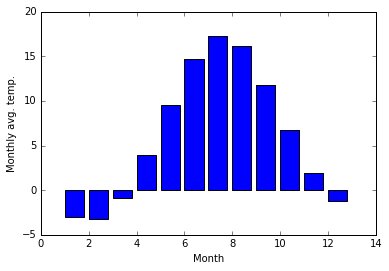

In [107]:
months = np.arange(1,13) # or np.unique(data[:,1])
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

## Exercise 
* Calculate the average temperature of each trimester and plot it (*Hint*: use np.logical_and to calculate the `and` between two arrays). Can you do it with one line of code only? 
* Plot the yearly records (that is maximum and minimum temperature) recorded each year from 1800 to 2010.

In [66]:
print((stockholm_data[300,1]))
print ((stockholm_data[300,1]) / 4)

10.0
2.5


In [69]:
import math
trimesters = np.arange(1,4)
trimesters

trimester_mean = [np.mean(stockholm_data[round((stockholm_data[:,1] ) / 4, 0) + 1 == trimester , 3]) for trimester in trimesters]

fig, ax = plt.subplots()

ticks = [1, 2,3]

ax.bar(trimesters, trimester_mean)
ax.set_xlabel("Trimester")
ax.set_xticks(ticks)
ax.set_ylabel("Avg trimeszter temperature");

TypeError: type numpy.ndarray doesn't define __round__ method

#### More functions: sum, prod, and trace

In [48]:
for x in range(1,13):
    print(int(x / 4))

0
0
0
1
1
1
1
2
2
2
2
3


In [94]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
# sum up all elements
np.sum(d)

45

In [96]:
# product of all elements
np.prod(d+1)

3628800

In [97]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [98]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [99]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [100]:
# same as: diag(A).sum()
np.trace(A)

110

When you have two dimensional objects, you can specificy along which dimension (axis) you want to perform the sum (or mean, or the maximum, etc.)
<img src="sum_axis.png">

In [101]:
x = np.array([[1, 1], [2, 2]])
print x
print x.sum(axis=0)   # columns (first dimension)
print x[:, 0].sum(), x[:, 1].sum()
print x.sum(axis=1)   # rows (second dimension)
print x[0, :].sum(), x[1, :].sum()

[[1 1]
 [2 2]]
[3 3]
3 3
[2 4]
2 4


***
## Exercise
By using the API exchange rate, get the rates each 3 months from 1999 to 2016. Create a csv file (you can look up the module ```csv``` or just write your own functions) with the rate for the currencies Euro, British Pound Sterling, Hungarian Forint, Japanese Yen, in this time span.
Use numpy to load this csv file and:
* plot in the same figure the yearly averages of these currencies over time.
* plot their moving average in a 5 year window.
* plot the maximum in each 2 years window for EUR and HUF.


## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.